In [9]:
import numpy as np
import keras

In [10]:
data = np.loadtxt("ccdefaults.csv", delimiter=';')
np.random.shuffle(data)

In [11]:
print(data.shape)

(30000, 25)


In [12]:
n_training = 28000

x_train = data[:n_training,0:24]
y_train = data[:n_training,24]

x_val = data[n_training:,0:24]
y_val = data[n_training:,24]

mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

x_train -= mean
x_train /= std

x_val -= mean
x_val /= std

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_shape=(24,), activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

Train on 28000 samples, validate on 2000 samples
Epoch 1/20
28000/28000 [==============================] - 1s 29us/step - loss: 0.6186 - acc: 0.6844 - val_loss: 0.5306 - val_acc: 0.7760
Epoch 2/20
28000/28000 [==============================] - 1s 22us/step - loss: 0.5047 - acc: 0.7965 - val_loss: 0.4859 - val_acc: 0.8045
Epoch 3/20
28000/28000 [==============================] - 1s 24us/step - loss: 0.4797 - acc: 0.8031 - val_loss: 0.4731 - val_acc: 0.8100
Epoch 4/20
28000/28000 [==============================] - 1s 24us/step - loss: 0.4718 - acc: 0.8038 - val_loss: 0.4685 - val_acc: 0.8160
Epoch 5/20
28000/28000 [==============================] - 1s 24us/step - loss: 0.4687 - acc: 0.8057 - val_loss: 0.4661 - val_acc: 0.8105
Epoch 6/20
28000/28000 [==============================] - 1s 25us/step - loss: 0.4673 - acc: 0.8065 - val_loss: 0.4651 - val_acc: 0.8140
Epoch 7/20
28000/28000 [==============================] - 1s 25us/step - loss: 0.4666 - acc: 0.8071 - val_loss: 0.4645 - val_acc:

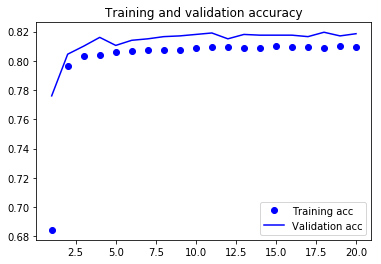

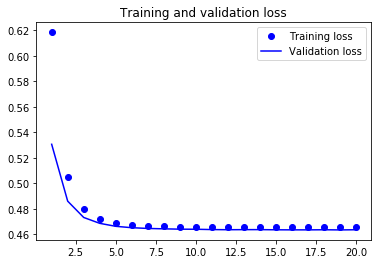

In [14]:
hist = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))

acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
print(model.predict(x_val[3].reshape(-1,24)))

[[0.07310089]]
